In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
import matplotlib.patches as patches

In [2]:
%matplotlib notebook

In [77]:
# Simulation space dimensions, etc. 
nx = 101
ny = 103
nz = 105
xmax,ymax,zmax = 1000.0, 1000.0, 1000.0 #micrometers

x = np.linspace(0,xmax,nx); dx = x[1]-x[0]; print('dx', dx)
y = np.linspace(0,ymax,ny); dy = y[1]-y[0]; print('dy',dy)
z = np.linspace(0,zmax,nz); dz = z[1]-z[0]; print('dz',dz)
nxmid = int(nx/2); print('nxmid =', nxmid); print('x(nxmid) =',x[nxmid])
nymid = int(ny/2)
nzmid = int(nz/2)
x = x-x[nxmid]
y = y-y[nymid]
z = z-z[nzmid]

# Define the box inside
Ldesiredx = 25. # Doesn't always work out to this because the grid is discretized
boxradx = int(Ldesiredx/dx)
Lx = boxradx*dx; print('Lx =', Lx)

Ldesiredy = 50.
boxrady = int(Ldesiredy/dy)
Ly = boxrady*dy; print('Ly =', Ly)

Ldesiredz = 50.
boxradz = int(Ldesiredz/dz)
Lz = boxradz*dz; print('Lz =', Lz)

ixboxmin = nxmid-boxradx; print(ixboxmin)
ixboxmax = nxmid+boxradx; print(ixboxmax)
iyboxmin = nymid-boxrady
iyboxmax = nymid+boxrady
izboxmin = nzmid-boxradz
izboxmax = nzmid+boxradz

# Setting up to slice through the volume
ixboxold = [ix for ix in range(ixboxmin,ixboxmax)]; print('Old method (list):', ixboxold)
ixbox = slice(ixboxmin,ixboxmax); print('New method (slice):', ixbox)
print('testing ...', x[ixboxold])
print('testing ...', x[ixbox])

iyboxold = [iy for iy in range(iyboxmin,iyboxmax)]; #print(iyboxold)
iybox = slice(iyboxmin,iyboxmax); #print(iybox)

izboxold = [iz for iz in range(izboxmin,izboxmax)]; #print(izboxold)
izbox = slice(izboxmin,izboxmax); #print(izbox)

xboxp = x[ixbox] - np.mean(x[ixbox])
yboxp = y[iybox] - np.mean(y[iybox])
zboxp = z[izbox] - np.mean(z[izbox])

xp = x - np.mean(x[ixbox])
yp = y - np.mean(y[iybox])
zp = z - np.mean(z[izbox]) 

dx 10.0
dy 9.803921568627452
dz 9.615384615384615
nxmid = 50
x(nxmid) = 500.0
Lx = 20.0
Ly = 49.01960784313726
Lz = 48.07692307692307
48
52
Old method (list): [48, 49, 50, 51]
New method (slice): slice(48, 52, None)
testing ... [-20. -10.   0.  10.]
testing ... [-20. -10.   0.  10.]


In [4]:
# Compute the diffusion coefficient at this temperature
D_SI_300 = 24.0e-6 # m^2/s
D_300 = D_SI_300 * 1e6  # um^2/us
Temp = 260.0
Pressure = .2
acoef = 2.072
D = D_300*(Temp/300)**acoef/(Pressure/1.0); print(D_300, D)

# Here's the part that involved some guesswork ... getting the Neumann coefficient
gneumann_nu_kin = D/(nx-1); print('gneumann_kin=', gneumann_nu_kin)
nu_kin_ml = 0.1633333333
kfactor = gneumann_nu_kin/nu_kin_ml; print('kfactor=', kfactor)
gneumann = kfactor * nu_kin_ml; print('gneumann=', gneumann)

# This is the far-field boundary
alphasigma = .36; print('alpha*sigma (and udirichlet)=', alphasigma)
udirichlet = alphasigma

24.0 89.20943386022752
gneumann_kin= 0.8920943386022752
kfactor= 5.461802074189808
gneumann= 0.8920943386022752
alpha*sigma (and udirichlet)= 0.36


In [5]:
# Aesthetics ... fills in the box with an arbitrary constant value
def fillinold(un,ixbox,iybox,izbox,overrideflag=0,overrideval=0):
    print('incoming un shape=',np.shape(un))
    border = cp(un[ixbox[0]-1,iybox[0],izbox[0]])
    if(overrideflag == 1):
        border = overrideval
    for ix in ixbox:        
        for iy in iybox:
            for iz in izbox:
                un[ix,iy,iz] = border
    return un

# Aesthetics ... fills in the box with an arbitrary constant value
def fillin(un,ixbox,iybox,izbox,overrideflag=0,overrideval=0):
    border = cp(un[ixbox.start-1,iybox.start,izbox.start])
    if(overrideflag == 1):
        border = overrideval
    un[ixbox,iybox,izbox] = border
    return un

In [6]:
# Initialize u0 and un as udirichlet
u0 = np.ones([nx, ny, nz])*udirichlet # old u values
u0 = fillinold(u0, ixboxold, iyboxold, izboxold, overrideflag=1, overrideval=0)
print(u0[:,nxmid,nymid])

u0 = np.ones([nx, ny, nz])*udirichlet # old u values
u0 = fillin(u0, ixbox, iybox, izbox, overrideflag=1, overrideval=0)
print(u0[:,nxmid,nymid])

incoming un shape= (101, 103, 105)
[0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.   0.   0.   0.   0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36]
[0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.   0.   0.   0.   0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.36
 0.36 0.36 0.36 0.36 0.36

In [7]:
# Physical parameters translated into values for computation
dx2 = dx**2
dy2 = dy**2
dz2 = dz**2
# dt = (dx2+dy2+dz2)/D/10; print('dt=',dt)
dt = (dx2+dy2+dz2)/D/100; print('dt=',dt)
Dxeff = D*dt/dx2; print('Dxeff=',Dxeff)
Dyeff = D*dt/dy2
Dzeff = D*dt/dz2
gneumanneffx = gneumann*dt/dx**2; print('gneumann effective (x)', gneumanneffx)
gneumanneffy = gneumann*dt/dy**2; print('gneumann effective (y)', gneumanneffy)
gneumanneffz = gneumann*dt/dz**2; print('gneumann effective (z)', gneumanneffz)

# The differential equation solver
def propagate(u0_orig,ixbox,iybox,izbox,gneumanneffx,gneumanneffy,gneumanneffz,Dxeff,Dyeff,Dzeff):
    
    # Diffusion
    u0 = cp(u0_orig)
    un = np.zeros(np.shape(u0))
    un[1:-1, 1:-1, 1:-1] = u0[1:-1, 1:-1, 1:-1] + ( \
    (u0[2:, 1:-1, 1:-1] - 2*u0[1:-1, 1:-1, 1:-1] + u0[:-2, 1:-1, 1:-1])*Dxeff + \
    (u0[1:-1, 2:, 1:-1] - 2*u0[1:-1, 1:-1, 1:-1] + u0[1:-1, :-2, 1:-1])*Dyeff + \
    (u0[1:-1, 1:-1, 2:] - 2*u0[1:-1, 1:-1, 1:-1] + u0[1:-1,1:-1,  :-2])*Dzeff )

    # Dirichlet outer boundary
    un[[0,-1],:,:]=udirichlet
    un[:,[0,-1],:]=udirichlet
    un[:,:,[0,-1]]=udirichlet
    
    # Pull out the stop and start indices
    ixmin = ixbox.start
    ixmax = ixbox.stop-1
    iymin = iybox.start
    iymax = iybox.stop-1
    izmin = izbox.start
    izmax = izbox.stop-1
    
    # Neumann inner boundary
    un[ixmin-1,iybox,izbox] = u0[ixmin-1,iybox,izbox] +(u0[ixmin-2,iybox,izbox] - u0[ixmin-1,iybox,izbox])*Dxeff -gneumanneffx
    un[ixmax+1,iybox,izbox] = u0[ixmax+1,iybox,izbox] +(u0[ixmax+2,iybox,izbox] - u0[ixmax+1,iybox,izbox])*Dxeff -gneumanneffx

    un[ixbox,iymin-1,izbox] = u0[ixbox,iymin-1,izbox] +(u0[ixbox,iymin-2,izbox] - u0[ixbox,iymin-1,izbox])*Dyeff -gneumanneffy
    un[ixbox,iymax+1,izbox] = u0[ixbox,iymax+1,izbox] +(u0[ixbox,iymax+2,izbox] - u0[ixbox,iymax+1,izbox])*Dyeff -gneumanneffy

    un[ixbox,iybox,izmin-1] = u0[ixbox,iybox,izmin-1] +(u0[ixbox,iybox,izmin-2] - u0[ixbox,iybox,izmin-1])*Dzeff -gneumanneffz
    un[ixbox,iybox,izmax+1] = u0[ixbox,iybox,izmax+1] +(u0[ixbox,iybox,izmax+2] - u0[ixbox,iybox,izmax+1])*Dzeff -gneumanneffz
    
    # Also zero-out inside the box (this is just aesthetic)
    un = fillin(un,ixbox, iybox, izbox, overrideflag=1, overrideval=0)
    
    return un

dt= 0.03234775594223659
Dxeff= 0.02885724994255737
gneumann effective (x) 0.0002885724994255737
gneumann effective (y) 0.00030023082840236685
gneumann effective (z) 0.0003121200153787005


In [8]:
# Initialize the state of the vapor field
un = cp(u0)

In [89]:
# Propagate forward a bunch of times
ntimes = 10
for i in range(ntimes):    
    un = propagate(un,ixbox,iybox,izbox,gneumanneffx,gneumanneffy,gneumanneffz,Dxeff,Dyeff,Dzeff)

<IPython.core.display.Javascript object>


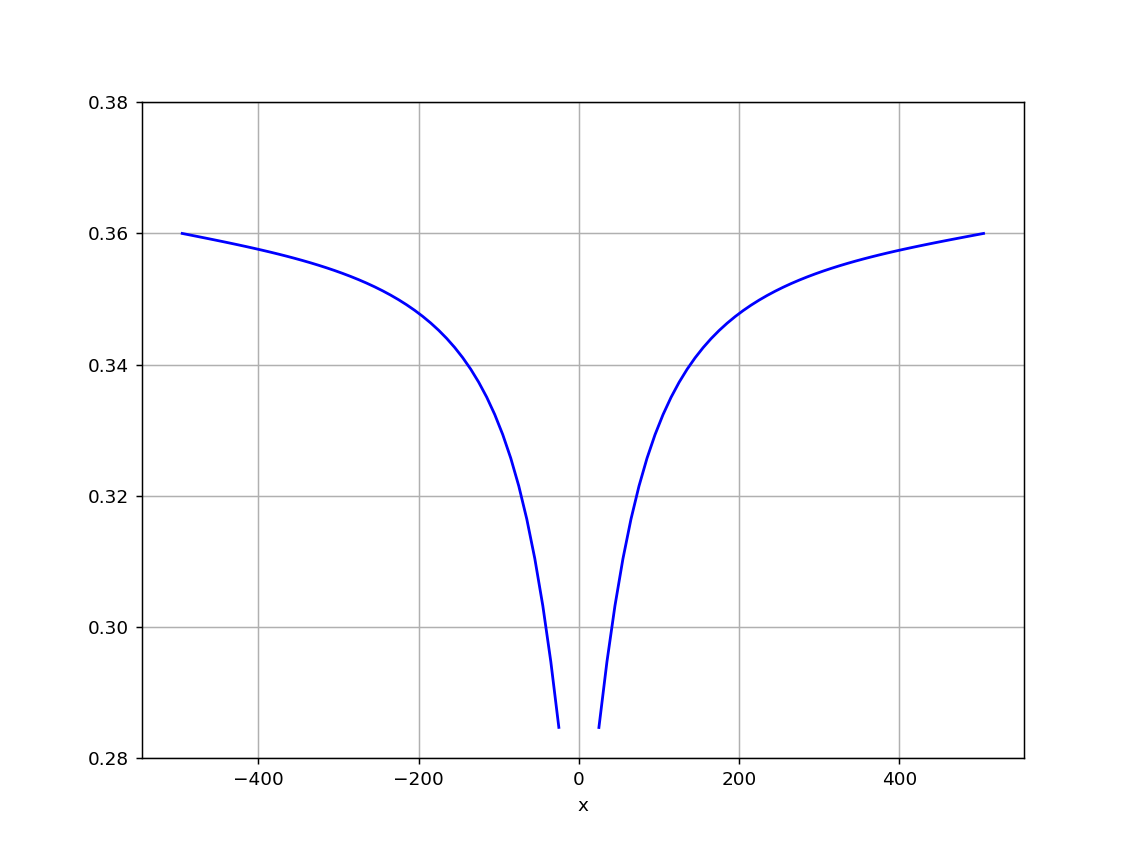

<IPython.core.display.Javascript object>


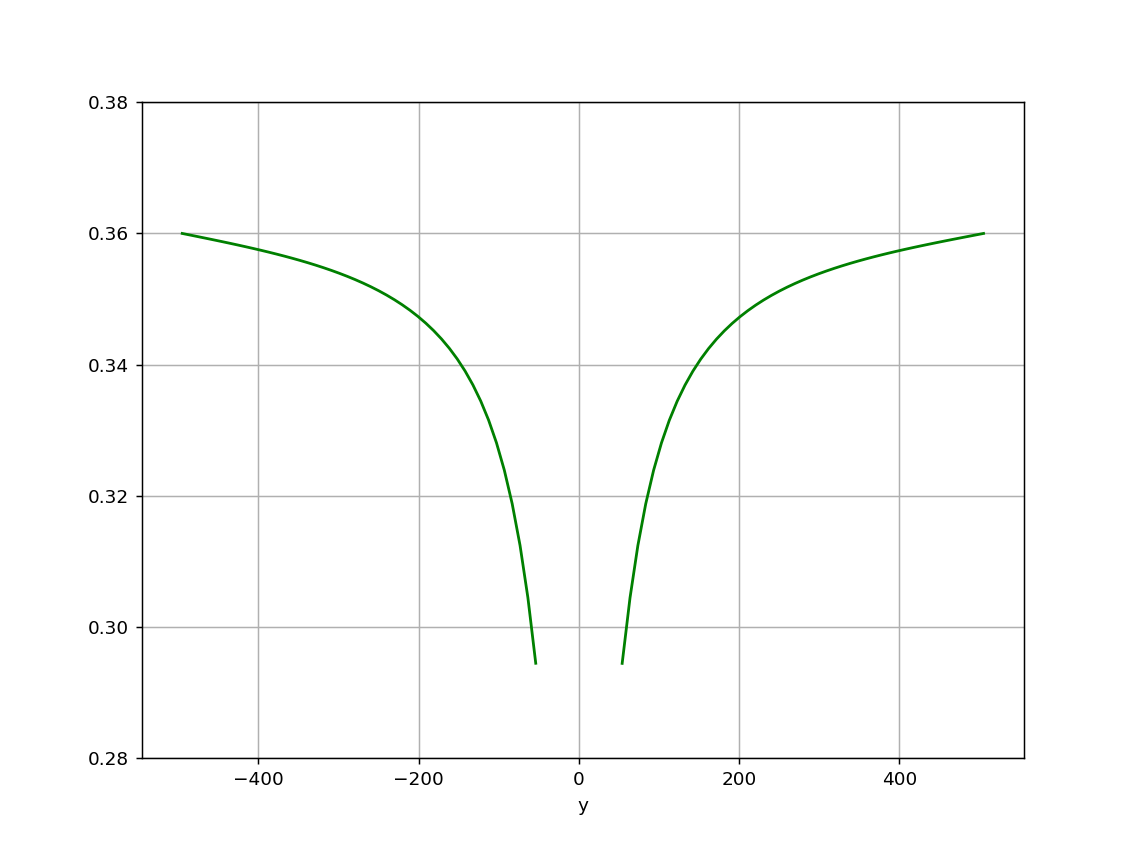

<IPython.core.display.Javascript object>


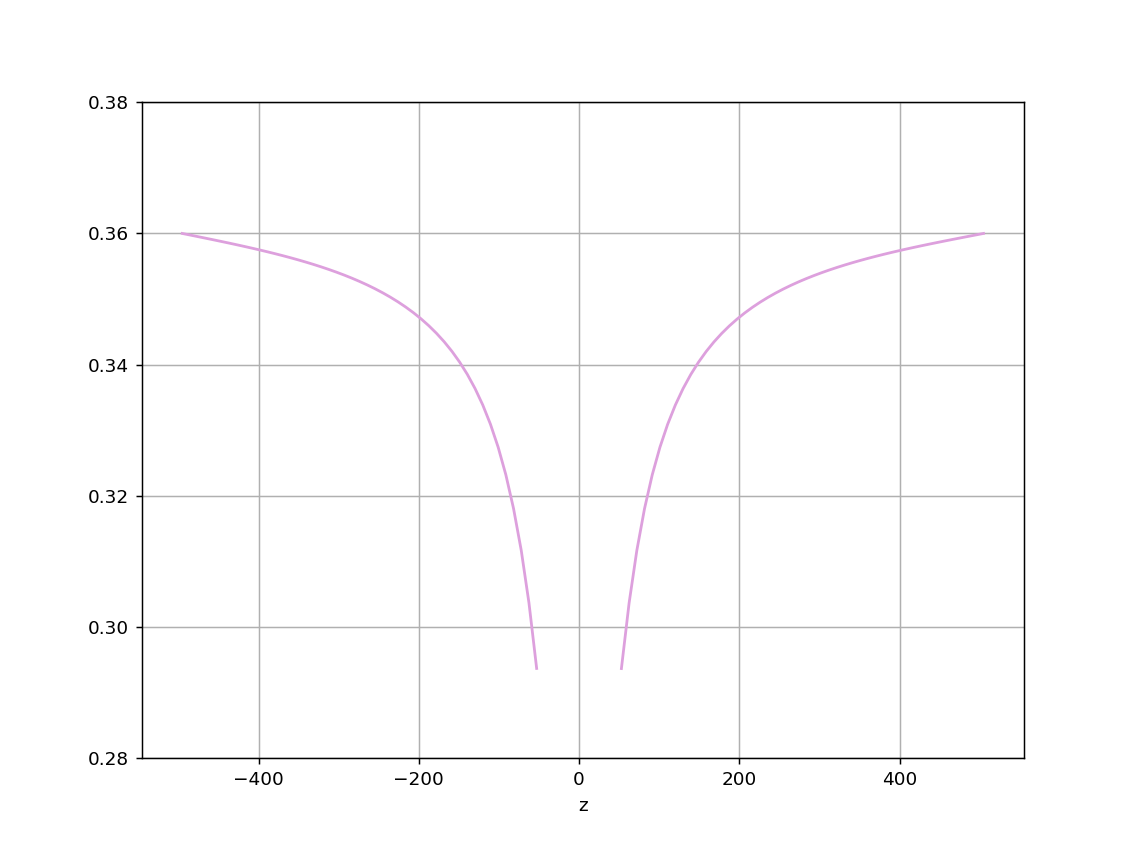

In [90]:
# Plotting from far afield up to the box
vertical_limits = [.28,.38]

ixbox_pre = slice(0,ixboxmin)
ixbox_post = slice(ixboxmax,nx)
plt.figure()
plt.plot(xp[ixbox_pre], un[ixbox_pre,nymid,nzmid], 'blue')
plt.plot(xp[ixbox_post],un[ixbox_post,nymid,nzmid],'blue')
plt.xlabel('x')
plt.ylim(vertical_limits)
plt.grid(True)

iybox_pre = slice(0,iyboxmin)
iybox_post = slice(iyboxmax,ny)
plt.figure()
plt.plot(yp[iybox_pre], un[nxmid,iybox_pre,nzmid], 'green')
plt.plot(yp[iybox_post],un[nxmid,iybox_post,nzmid],'green')
plt.xlabel('y')
plt.ylim(vertical_limits)
plt.grid(True)

izbox_pre = slice(0,izboxmin)
izbox_post = slice(izboxmax,nz)
plt.figure()
plt.plot(zp[izbox_pre], un[nxmid,nymid,izbox_pre], 'plum')
plt.plot(zp[izbox_post],un[nxmid,nymid,izbox_post],'plum')
plt.xlabel('z')
plt.ylim(vertical_limits)
plt.grid(True)

<IPython.core.display.Javascript object>


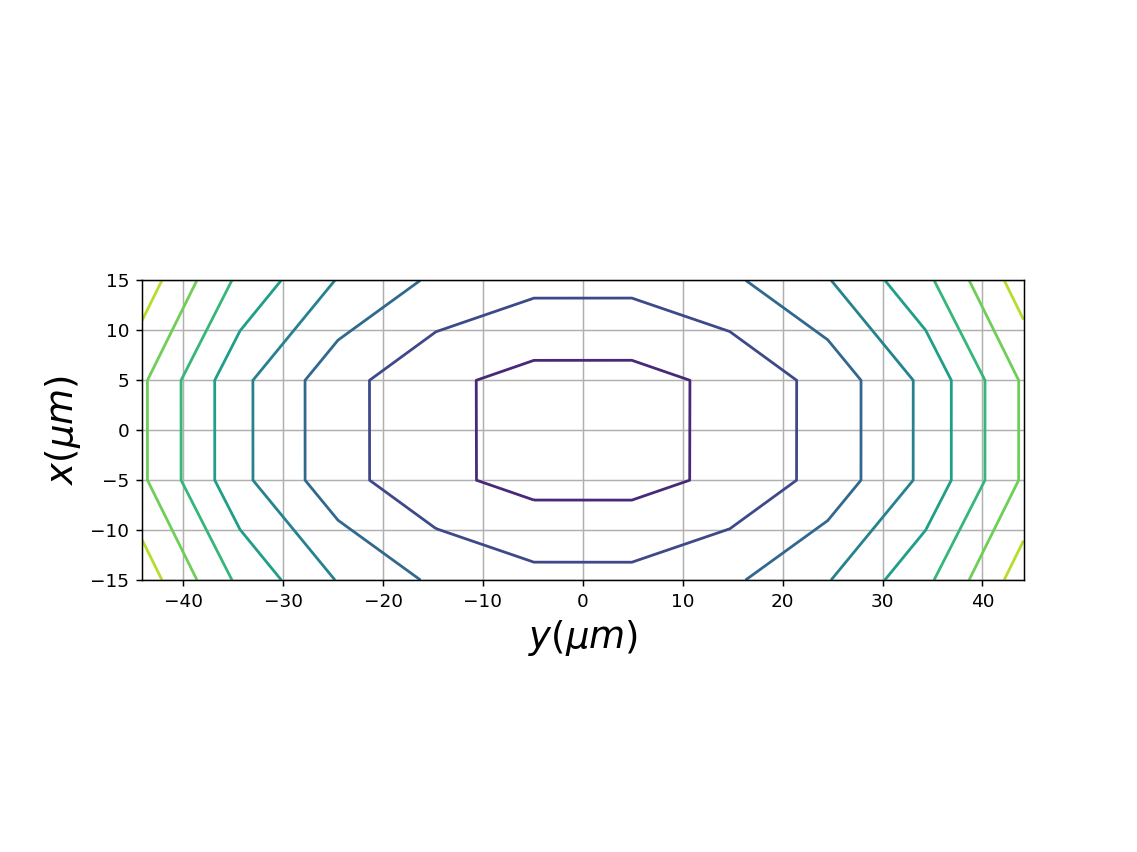

In [91]:
# Graph y-x plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contour(yboxp,xboxp,un[ixbox,iybox,izboxmax]*100)
ax.set_xlabel(r'$y (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.gca().set_aspect('equal')
plt.grid(True)
# fig.colorbar(CS)

<IPython.core.display.Javascript object>


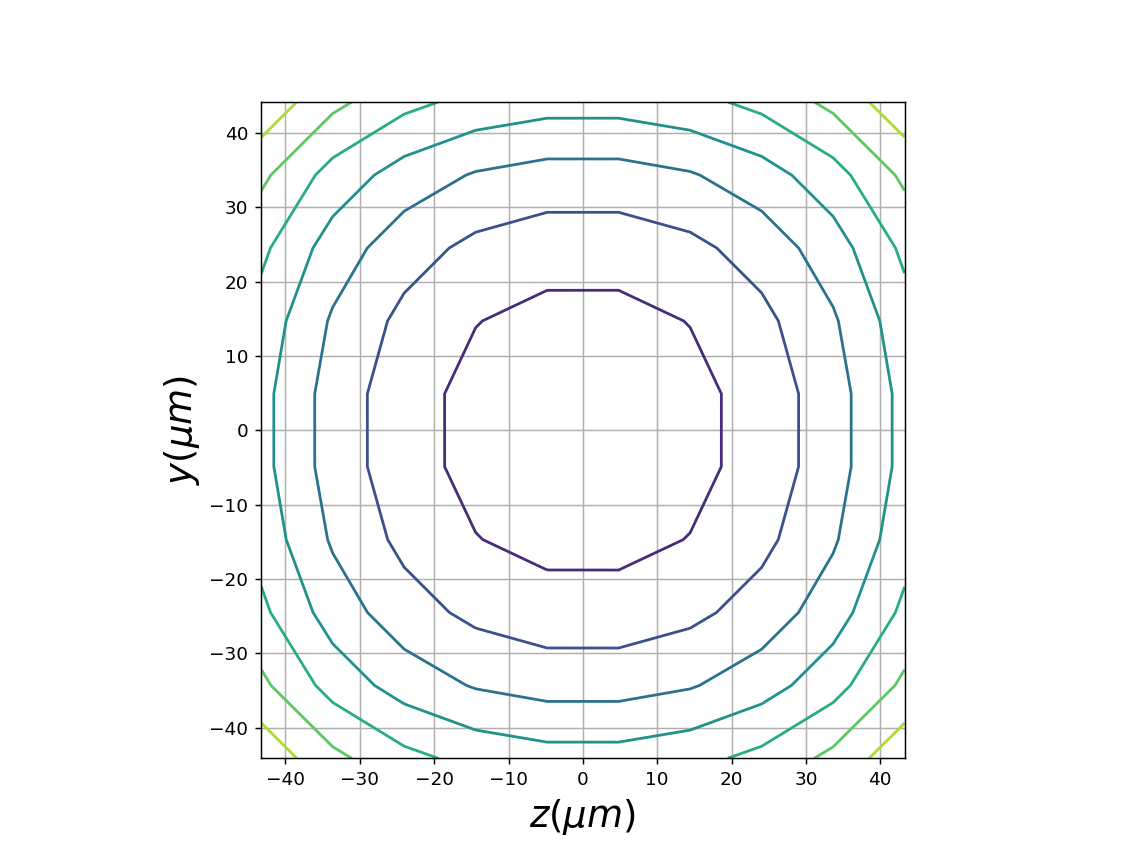

In [92]:
# Graph z-y plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contour(zboxp,yboxp,un[ixboxmax,iybox,izbox]*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$y (\mu m)$', fontsize=20)
plt.gca().set_aspect('equal')
plt.grid(True)
# fig.colorbar(CS)

<IPython.core.display.Javascript object>


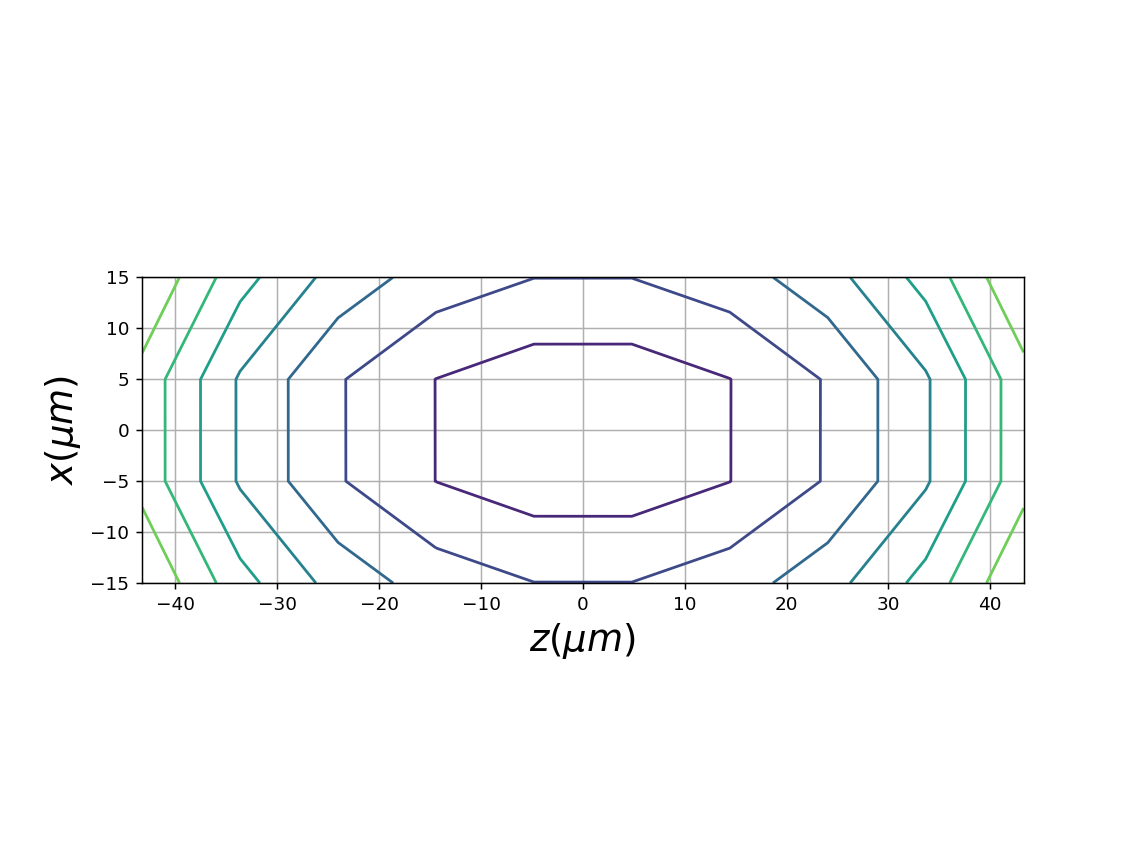

In [93]:
# Graph z-x plane as contour plots 
fig,ax = plt.subplots()
CS = ax.contour(zboxp,xboxp,un[ixbox,iyboxmax,izbox]*100)
ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
plt.grid(True)
plt.gca().set_aspect('equal')
# fig.colorbar(CS)

<IPython.core.display.Javascript object>


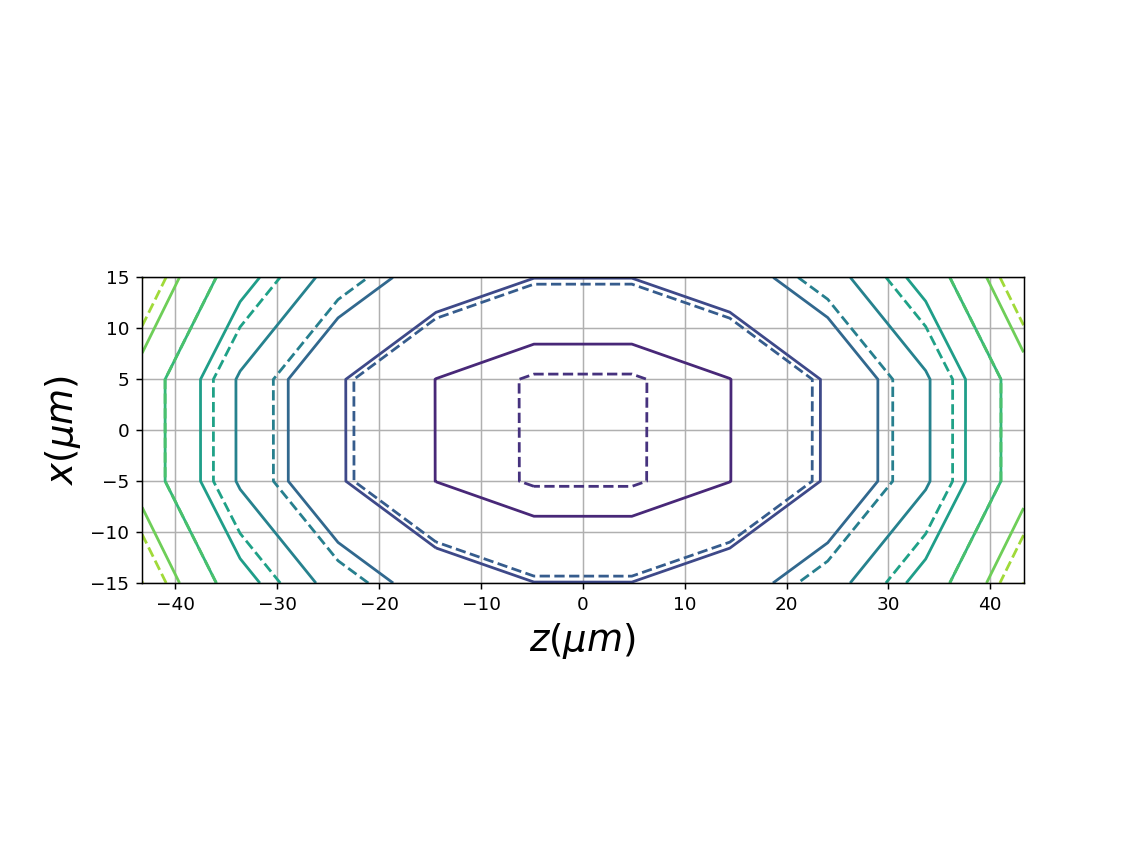

In [98]:
# # Graph z-x plane as contour plots 
# fig,ax = plt.subplots()
# CS = ax.contour(zboxp,xboxp,un[ixbox,iyboxmax,izbox]*100)
# testrun = un[ixbox,iyboxmax,izbox]*100*1.1
# CS = ax.contour(zboxp,xboxp,testrun,linestyles='dashed')

# ax.set_xlabel(r'$z (\mu m)$', fontsize=20)
# ax.set_ylabel(r'$x (\mu m)$', fontsize=20)
# plt.grid(True)
# plt.gca().set_aspect('equal')